# Story Telling Michaell Abelard Hendra 71487

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('AEP_daily_sum.csv')
df['Date'] = pd.to_datetime(df['Date'])         # Ubah kolom 'Date' jadi tipe datetime
df.set_index('Date', inplace=True) 
df.head()

,Total_AEP_MW
Date,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0


Text(0.5, 0, 'Date')

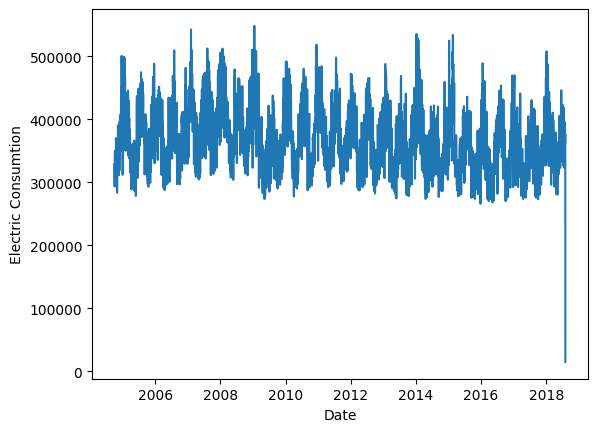

In [3]:
plt.plot(df.index, df['Total_AEP_MW'])
plt.ylabel('Electric Consumtion')  
plt.xlabel('Date')

In [66]:
df=df[:-1]

In [5]:
df.tail()

,Total_AEP_MW
Date,
2018-07-29,327792.0
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0
2018-08-02,376504.0


Text(0.5, 0, 'Date')

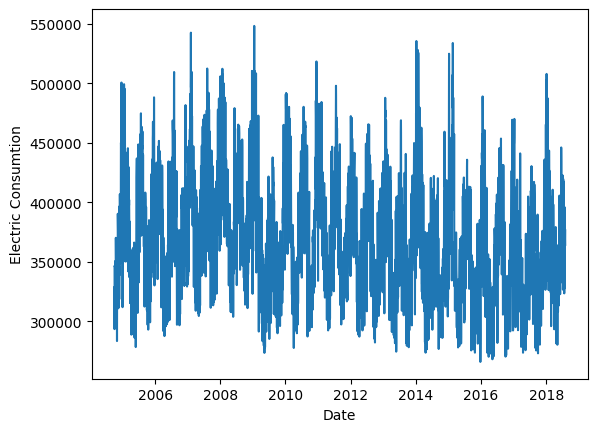

In [6]:
plt.plot(df.index, df['Total_AEP_MW'])  
plt.ylabel('Electric Consumtion')  
plt.xlabel('Date')

C:\Users\71487\AppData\Local\Temp\ipykernel_26160\3373789050.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Total_AEP_MW'].resample('M').sum()# Jumlahkan data per bulan
C:\Users\71487\AppData\Local\Temp\ipykernel_26160\3373789050.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['Total_AEP_MW'].resample('Y').sum() # Jumlahkan data per tahun


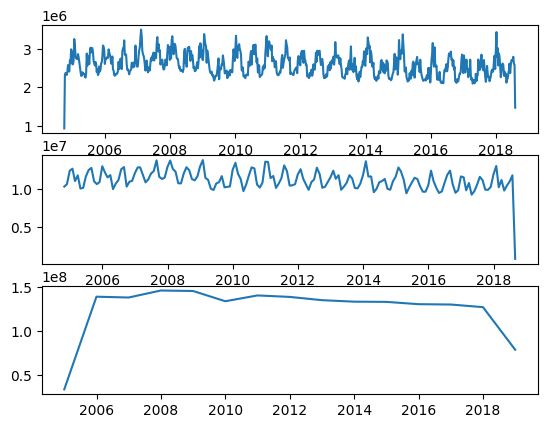

In [7]:
weekly = df['Total_AEP_MW'].resample('W').sum() # Jumlahkan data per minggu
monthly = df['Total_AEP_MW'].resample('M').sum()# Jumlahkan data per bulan
yearly = df['Total_AEP_MW'].resample('Y').sum() # Jumlahkan data per tahun
fig, axs = plt.subplots(3, 1)   # Bikin 3 grafik (weekly, monthly, yearly)
axs[0].plot(weekly.index, weekly)   # Weekly plot
axs[1].plot(monthly.index, monthly) # Monthly plot
axs[2].plot(yearly.index, yearly)   # Yearly plot

C:\Users\71487\AppData\Local\Temp\ipykernel_26160\2404047543.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Total_AEP_MW'].resample('M').mean()# Jumlahkan data per bulan
C:\Users\71487\AppData\Local\Temp\ipykernel_26160\2404047543.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['Total_AEP_MW'].resample('Y').mean() # Jumlahkan data per tahun


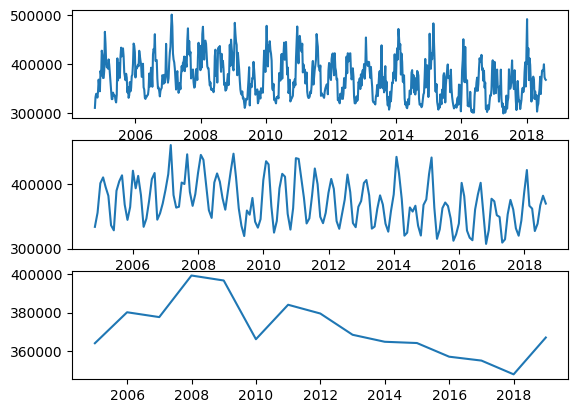

In [8]:
weekly = df['Total_AEP_MW'].resample('W').mean() # Jumlahkan data per minggu
monthly = df['Total_AEP_MW'].resample('M').mean()# Jumlahkan data per bulan
yearly = df['Total_AEP_MW'].resample('Y').mean() # Jumlahkan data per tahun
fig, axs = plt.subplots(3, 1)   # Bikin 3 grafik (weekly, monthly, yearly)
axs[0].plot(weekly.index, weekly)   # Weekly plot
axs[1].plot(monthly.index, monthly) # Monthly plot
axs[2].plot(yearly.index, yearly)   # Yearly plot

C:\Users\71487\AppData\Local\Temp\ipykernel_26160\2570377788.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sum = df['Total_AEP_MW'].resample('Y').mean()


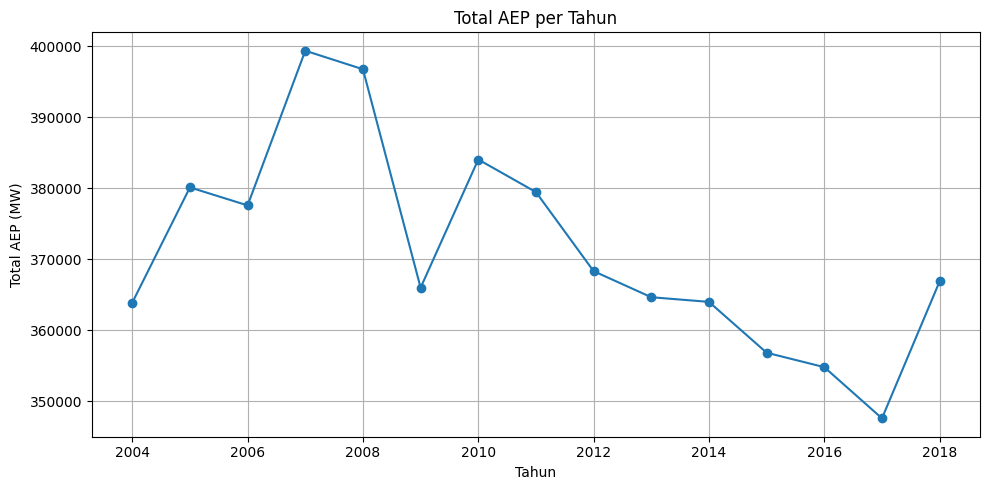

In [9]:
yearly_sum = df['Total_AEP_MW'].resample('Y').mean()

# Plot tren tahunan
plt.figure(figsize=(10, 5))
plt.plot(yearly_sum.index.year, yearly_sum.values, marker='o', linestyle='-')
plt.title('Total AEP per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total AEP (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\71487\AppData\Local\Temp\ipykernel_26160\2267797887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_years['Year'] = df_selected_years.index.year
C:\Users\71487\AppData\Local\Temp\ipykernel_26160\2267797887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_years['Month'] = df_selected_years.index.month


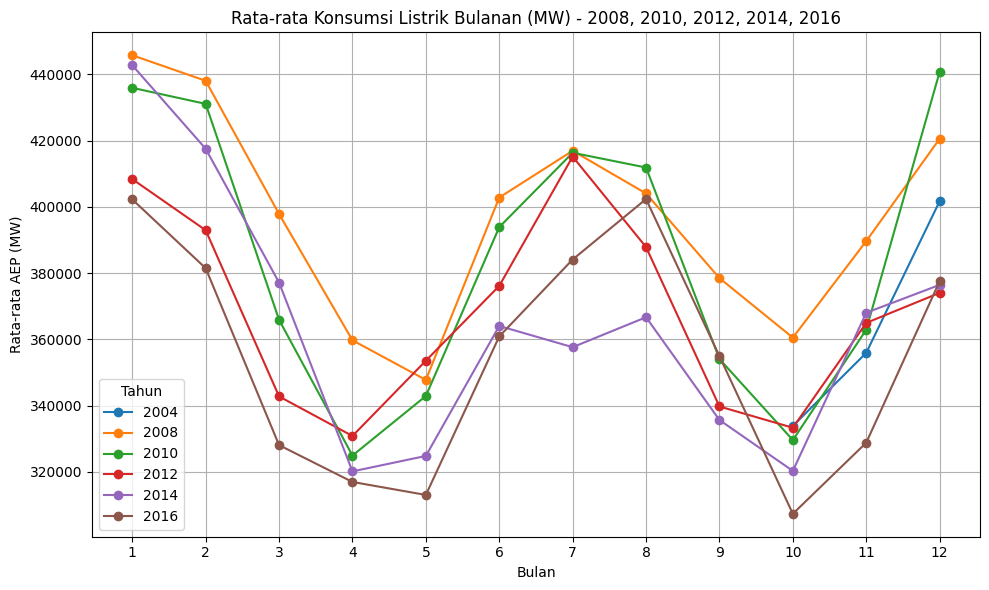

In [10]:
df_selected_years = df[df.index.year.isin([2004,2008,2010,2012, 2014, 2016])]

# Tambahkan kolom Tahun dan Bulan
df_selected_years['Year'] = df_selected_years.index.year
df_selected_years['Month'] = df_selected_years.index.month

# Hitung rata-rata bulanan untuk setiap tahun
monthly_avg_by_year = df_selected_years.groupby(['Month', 'Year'])['Total_AEP_MW'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))
for year in monthly_avg_by_year.columns:
    plt.plot(monthly_avg_by_year.index, monthly_avg_by_year[year], marker='o', label=str(year))

plt.title('Rata-rata Konsumsi Listrik Bulanan (MW) - 2008, 2010, 2012, 2014, 2016')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata AEP (MW)')
plt.xticks(range(1, 13))
plt.legend(title='Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\71487\AppData\Local\Temp\ipykernel_26160\1378976861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year'] = df_selected.index.year
C:\Users\71487\AppData\Local\Temp\ipykernel_26160\1378976861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Month'] = df_selected.index.month


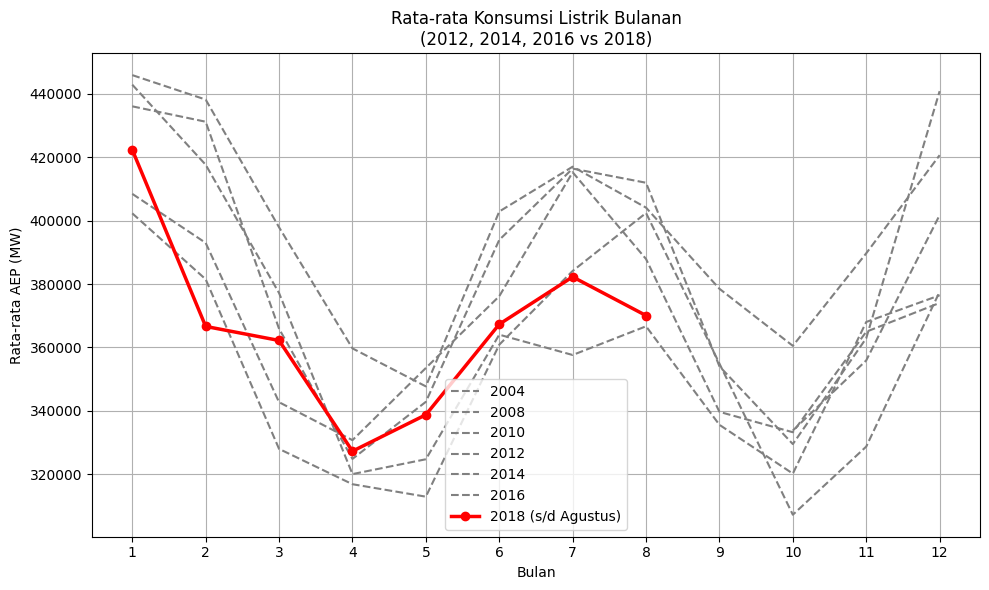

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter tahun yang diinginkan
selected_years = [2004,2008,2010,2012, 2014, 2016, 2018]
df_selected = df[df.index.year.isin(selected_years)]

# Tambahkan kolom tahun dan bulan
df_selected['Year'] = df_selected.index.year
df_selected['Month'] = df_selected.index.month

# Hitung rata-rata bulanan
monthly_avg = df_selected.groupby(['Month', 'Year'])['Total_AEP_MW'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))

# Plot tahun selain 2018 dalam warna abu-abu
for year in [2004,2008,2010,2012, 2014, 2016]:
    plt.plot(monthly_avg.index, monthly_avg[year], color='gray', linestyle='--', label=str(year))

# Plot 2018 dengan warna merah hanya sampai Agustus
plt.plot(monthly_avg.index[:8], monthly_avg.loc[1:8, 2018], color='red', marker='o', linewidth=2.5, label='2018 (s/d Agustus)')

# Penyesuaian tampilan
plt.title('Rata-rata Konsumsi Listrik Bulanan\n(2012, 2014, 2016 vs 2018)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata AEP (MW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Train Test Dataset

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# --- Step 1: Setup Data ---
window_size = 30
train_data = df[df.index < '2018-01-01']['Total_AEP_MW']
test_data = df[(df.index >= '2018-01-01') & (df.index <= '2018-08-03')]['Total_AEP_MW']

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1)).flatten()
test_scaled = scaler.transform(test_data.values.reshape(-1, 1)).flatten()


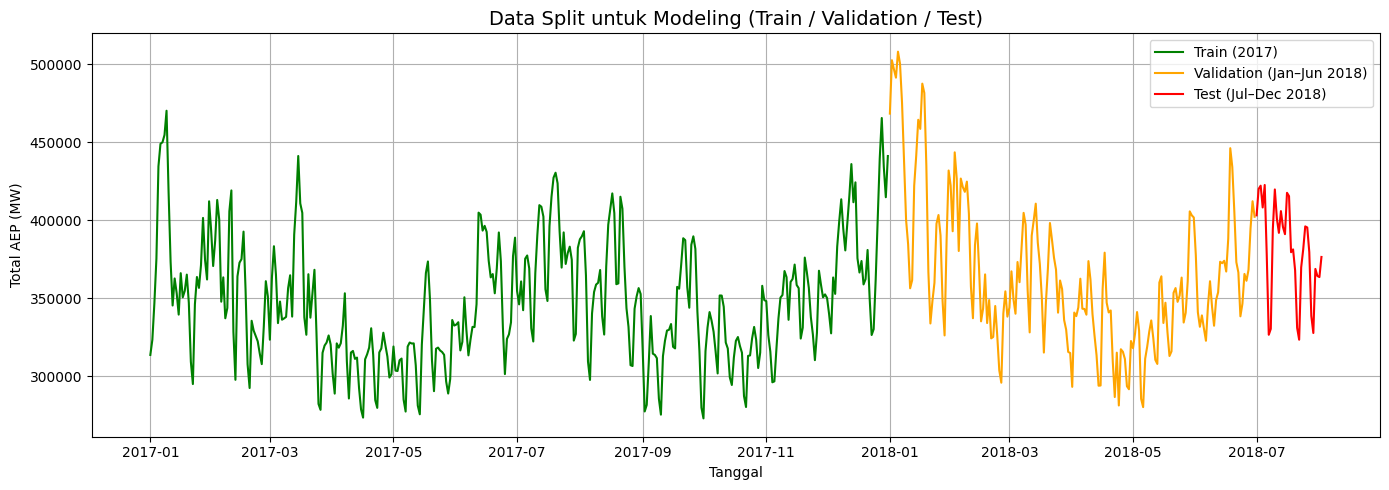

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data mulai dari 2017
df_2017_onward = df[df.index >= '2017-01-01'][['Total_AEP_MW']].copy()

# Bagi menjadi:
# - Train: Jan–Dec 2017
# - Validation: Jan–Jun 2018
# - Test: Jul–Dec 2018
train = df_2017_onward[df_2017_onward.index < '2018-01-01']
val = df_2017_onward[(df_2017_onward.index >= '2018-01-01') & (df_2017_onward.index < '2018-07-01')]
test = df_2017_onward[df_2017_onward.index >= '2018-07-01']

# Plot
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['Total_AEP_MW'], label='Train (2017)', color='green')
plt.plot(val.index, val['Total_AEP_MW'], label='Validation (Jan–Jun 2018)', color='orange')
plt.plot(test.index, test['Total_AEP_MW'], label='Test (Jul–Dec 2018)', color='red')

plt.title('Data Split untuk Modeling (Train / Validation / Test)', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Total AEP (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ANN

In [56]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# --- Setup ---
window_size = 30
train_data = df[df.index < '2018-01-01']['Total_AEP_MW']
test_data = df[(df.index >= '2018-01-01') & (df.index <= '2018-08-03')]['Total_AEP_MW']



# Scaling
# scaler = MinMaxScaler()
# train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1)).flatten()

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1)).flatten()

In [57]:
# Create windowed train dataset
def create_windowed_dataset(series, window_size=30):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_windowed_dataset(train_scaled, window_size)

# --- Build ANN ---
model = Sequential([
    Input(shape=(window_size,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    # Dense(32, activation='relu'),
    # Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=150, batch_size=32,
          validation_split=0.1,callbacks=[early_stop], verbose=1)

# --- Predict step by step on test data (recursive with known target) ---
# Start seed from last 30 days of train
last_30 = train_scaled[-window_size:].tolist()
predictions = []

# Loop through actual test values (simulasi real inference hari ke hari)
# test_scaled = scaler.transform(test_data.values.reshape(-1, 1)).flatten()
test_scaled = scaler.transform(test_data.values.reshape(-1, 1)).flatten()

for true_val in test_scaled:
    X_input = np.array(last_30[-window_size:]).reshape(1, -1)
    pred = model.predict(X_input, verbose=0)[0][0]
    predictions.append(pred)
    # Di real case, kamu mungkin tidak punya true_val, tapi di sini kita pakai untuk update input
    last_30.append(true_val)  # Karena kita seolah tahu data aktual harian

# Inverse transform hasil prediksi
y_pred = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_true = test_data.values.reshape(-1, 1)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
mean_actual = np.mean(y_true)
rmse_percent = (rmse / mean_actual) * 100

# Print
print(f"RMSE           : {rmse:.2f} MW")
print(f"MAPE           : {mape:.2f} %")
print(f"RMSE (Relative): {rmse_percent:.2f} % dari rata-rata aktual")

Epoch 1/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0649 - val_loss: 0.0164
Epoch 2/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - val_loss: 0.0136
Epoch 3/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 4/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 5/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 6/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 7/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - val_loss: 0.0092
Epoch 8/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 9/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 10/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 11/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 12/150
136/136 ━━━━━━━━━━━━━━━━━━━━

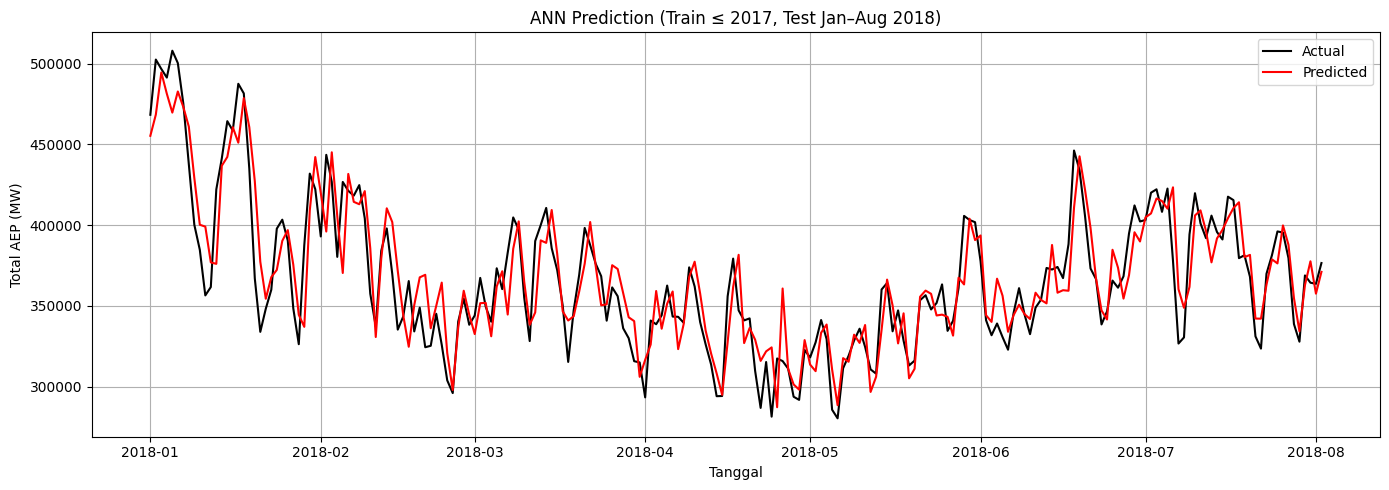

In [58]:
# --- Plot ---
plt.figure(figsize=(14, 5))
plt.plot(test_data.index, y_true, label='Actual', color='black')
plt.plot(test_data.index, y_pred, label='Predicted', color='red')
plt.title('ANN Prediction (Train ≤ 2017, Test Jan–Aug 2018)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2018 Prediction

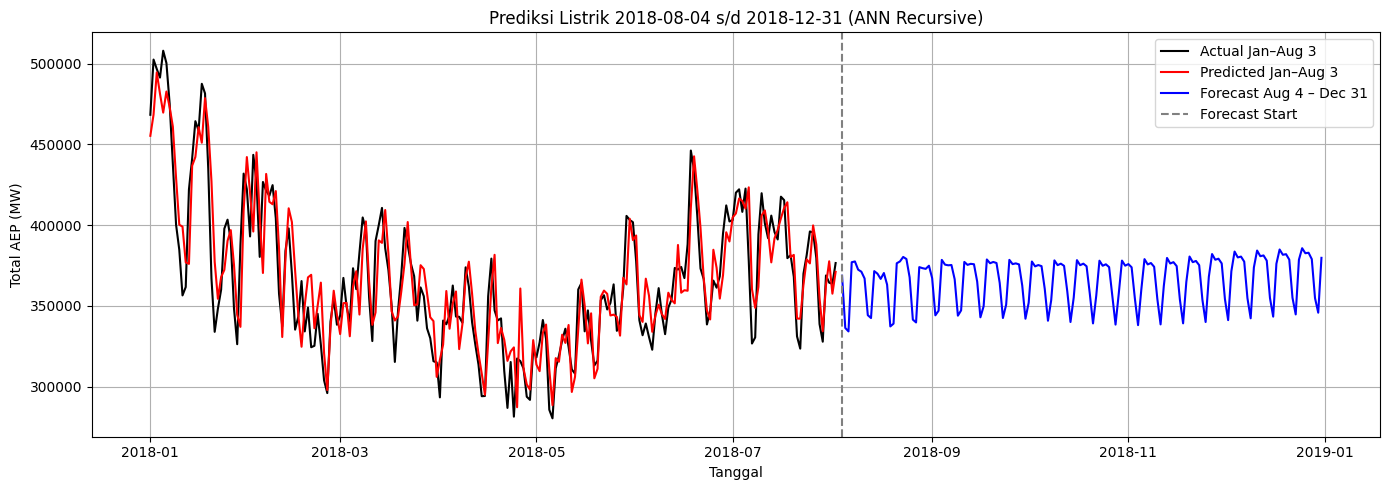

In [59]:
# --- Prediksi ke depan (tanpa ground truth) ---
from datetime import datetime

# Hitung jumlah hari prediksi ke depan
start_date = pd.to_datetime('2018-08-04')
end_date = pd.to_datetime('2018-12-31')
n_days = (end_date - start_date).days + 1

# Gunakan last_30 yang terakhir dari prediksi sebelumnya
future_input = last_30[-window_size:]  # Ini sudah include semua data s.d. 2018-08-03
future_preds = []

for _ in range(n_days):
    X_input = np.array(future_input[-window_size:]).reshape(1, -1)
    next_pred_scaled = model.predict(X_input, verbose=0)[0][0]
    future_preds.append(next_pred_scaled)
    future_input.append(next_pred_scaled)

# Inverse transform hasil prediksi
future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Buat index tanggalnya
forecast_dates = pd.date_range(start=start_date, end=end_date)

# Plot hasil
plt.figure(figsize=(14, 5))
plt.plot(test_data.index, y_true, label='Actual Jan–Aug 3', color='black')
plt.plot(test_data.index, y_pred, label='Predicted Jan–Aug 3', color='red')
plt.plot(forecast_dates, future_preds_inv, label='Forecast Aug 4 – Dec 31', color='blue')
plt.axvline(pd.Timestamp('2018-08-04'), linestyle='--', color='gray', label='Forecast Start')
plt.title('Prediksi Listrik 2018-08-04 s/d 2018-12-31 (ANN Recursive)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare

In [60]:
# --- Buat gabungan data aktual (Jan–Aug 3) + prediksi (Aug 4–Dec 31) ---
# Pastikan y_true bentuknya 1D
actual_part = pd.Series(y_true.flatten(), index=test_data.index, name='AEP')
future_part = pd.Series(future_preds_inv.flatten(), index=forecast_dates, name='AEP')

# Gabungkan dua bagian
full_2018 = pd.concat([actual_part, future_part])

# Hitung rata-rata per bulan
monthly_mean_2018 = full_2018.resample('M').mean()

# Tampilkan hasil
print(monthly_mean_2018)

2018-01-31    422277.000000
2018-02-28    366639.928571
2018-03-31    362214.387097
2018-04-30    327341.866667
2018-05-31    338808.129032
2018-06-30    367326.000000
2018-07-31    382238.935484
2018-08-31    363521.227083
2018-09-30    365305.312500
2018-10-31    365511.857863
2018-11-30    367208.808333
2018-12-31    370104.334677
Freq: ME, Name: AEP, dtype: float64


C:\Users\71487\AppData\Local\Temp\ipykernel_26160\70049411.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_2018 = full_2018.resample('M').mean()


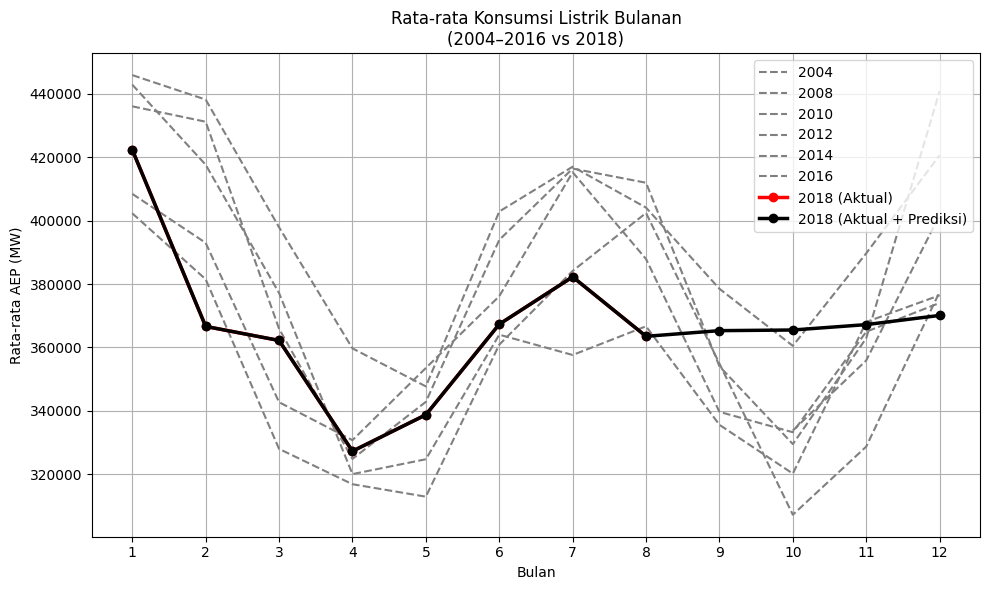

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Tahun yang akan dibandingkan
selected_years = [2004, 2008, 2010, 2012, 2014, 2016, 2018]

# Siapkan df utama
df_selected = df[df.index.year.isin(selected_years)].copy()

# Tambahkan kolom year dan month
df_selected['Year'] = df_selected.index.year
df_selected['Month'] = df_selected.index.month

# Tambahkan data prediksi 2018 (Agustus–Desember)
pred_2018 = pd.Series(future_preds_inv.flatten(), index=forecast_dates, name='Total_AEP_MW')
pred_df = pred_2018.to_frame()
pred_df['Year'] = pred_df.index.year
pred_df['Month'] = pred_df.index.month

# Gabungkan dengan df_selected
df_full_2018 = pd.concat([df_selected[df_selected['Year'] == 2018], pred_df])
df_selected = pd.concat([df_selected[df_selected['Year'] != 2018], df_full_2018])

# Hitung rata-rata bulanan per tahun
monthly_avg = df_selected.groupby(['Month', 'Year'])['Total_AEP_MW'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))

# Tahun lama (abu-abu putus-putus)
for year in [2004, 2008, 2010, 2012, 2014, 2016]:
    plt.plot(monthly_avg.index, monthly_avg[year], color='gray', linestyle='--', label=str(year))

# 2018 aktual s/d Agustus (merah)
plt.plot(monthly_avg.index[:8], monthly_avg.loc[1:8, 2018], color='red', marker='o', linewidth=2.5, label='2018 (Aktual)')

# 2018 full (hitam) — gabungan aktual + prediksi
plt.plot(monthly_avg.index, monthly_avg[2018], color='black', marker='o', linewidth=2.5, label='2018 (Aktual + Prediksi)')

# Penyesuaian tampilan
plt.title('Rata-rata Konsumsi Listrik Bulanan\n(2004–2016 vs 2018)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata AEP (MW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


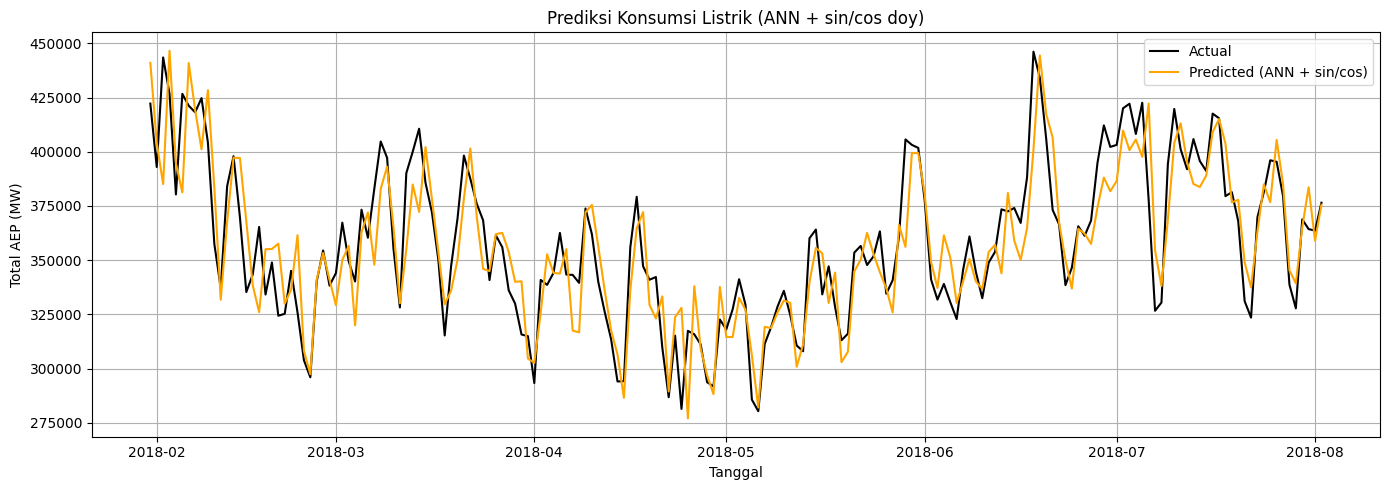

(np.float64(17643.52924380845),
 3.796444668658609,
 np.float64(4.930049926422672))

In [114]:
# Tambahkan fitur musiman ke df
df['day_of_year'] = df.index.dayofyear
df['sin_doy'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_doy'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Setup data dan fitur
features = ['Total_AEP_MW', 'sin_doy', 'cos_doy']
window_size = 30

# Pisahkan train dan test
train_data = df[df.index < '2018-01-01'][features]
test_data = df[(df.index >= '2018-01-01') & (df.index <= '2018-08-03')][features]

# Pisahkan scaler untuk target dan fitur
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()

train_target_scaled = target_scaler.fit_transform(train_data[['Total_AEP_MW']])
train_features_scaled = feature_scaler.fit_transform(train_data[['sin_doy', 'cos_doy']])
train_scaled = np.hstack([train_target_scaled, train_features_scaled])

test_target_scaled = target_scaler.transform(test_data[['Total_AEP_MW']])
test_features_scaled = feature_scaler.transform(test_data[['sin_doy', 'cos_doy']])
test_scaled = np.hstack([test_target_scaled, test_features_scaled])

# Windowing untuk ANN (multivariate)
def create_windowed_ann(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        window = data[i:i+window_size]
        sin = window[:, 1]
        cos = window[:, 2]
        target = window[:, 0]
        # Rata-rata sin & cos + flatten target historis
        features = np.concatenate([target, [np.mean(sin)], [np.mean(cos)]])
        X.append(features)
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_windowed_ann(train_scaled, window_size)
X_test, y_test = create_windowed_ann(test_scaled, window_size)

# Build ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(window_size + 2,)),  # 30 AEP + sin mean + cos mean
    Dense(64),
    Dense(80, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse') #0.0005 dan 150 td oke
early_stop = EarlyStopping(patience=10, restore_best_weights=True) #0.0005 dan 1500 oke jg

# Train model
history = model.fit(X_train, y_train, validation_split=0.1,
                    epochs=3500, batch_size=32, callbacks=[early_stop], verbose=0)

# Predict test
y_pred_scaled = model.predict(X_test).flatten()
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot hasil
forecast_index = test_data.index[window_size:]
plt.figure(figsize=(14, 5))
plt.plot(forecast_index, y_true, label='Actual', color='black')
plt.plot(forecast_index, y_pred, label='Predicted (ANN + sin/cos)', color='orange')
plt.title('Prediksi Konsumsi Listrik (ANN + sin/cos doy)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
rmse_percent = (rmse / np.mean(y_true)) * 100

rmse, mape, rmse_percent

In [115]:
# Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
rmse_percent = (rmse / np.mean(y_true)) * 100

rmse, mape, rmse_percent

(np.float64(17643.52924380845),
 3.796444668658609,
 np.float64(4.930049926422672))

c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarni

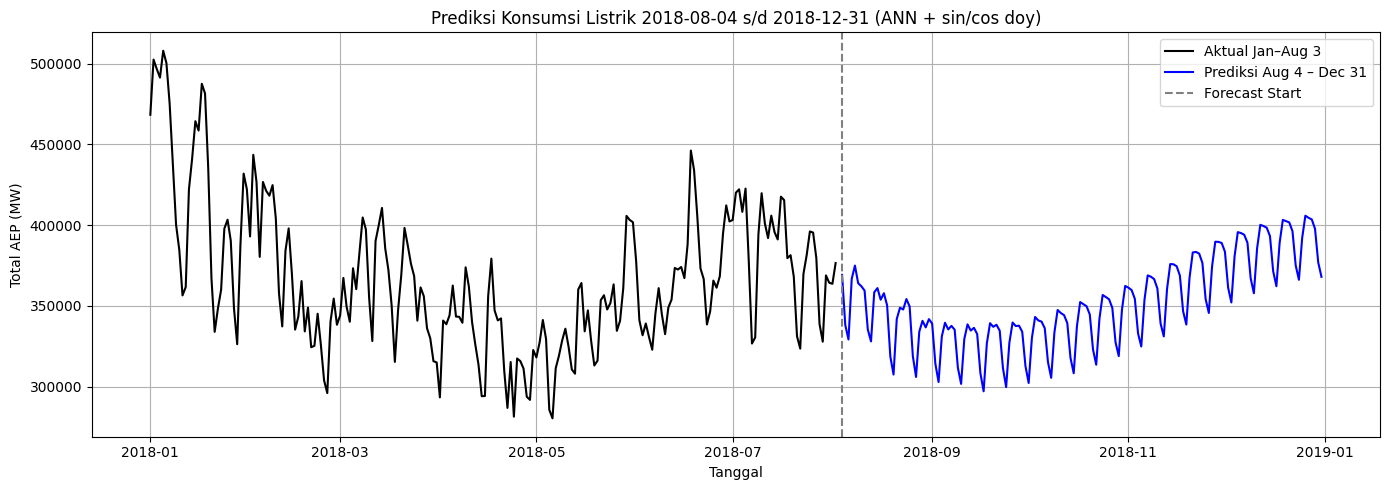

In [116]:
from datetime import timedelta

# Inisialisasi prediksi recursive
start_date = pd.to_datetime('2018-08-04')
end_date = pd.to_datetime('2018-12-31')
n_days = (end_date - start_date).days + 1
forecast_dates = pd.date_range(start=start_date, periods=n_days)

# Ambil last window dari data sebelum 2018-08-04
last_window_df = df.loc[df.index < start_date].copy()
last_window_df = last_window_df[['Total_AEP_MW', 'sin_doy', 'cos_doy']]
last_scaled_target = target_scaler.transform(last_window_df[['Total_AEP_MW']])
last_scaled_features = feature_scaler.transform(last_window_df[['sin_doy', 'cos_doy']])
last_window = np.hstack([last_scaled_target, last_scaled_features])[-window_size:].tolist()

# Simpan prediksi
future_preds_scaled = []

for day in forecast_dates:
    # Buat fitur musiman hari ini
    sin_doy = np.sin(2 * np.pi * day.dayofyear / 365)
    cos_doy = np.cos(2 * np.pi * day.dayofyear / 365)
    scaled_sin, scaled_cos = feature_scaler.transform([[sin_doy, cos_doy]])[0]

    # Ambil target AEP dari window (scaled)
    recent_targets = [row[0] for row in last_window[-window_size:]]
    input_vector = np.array(recent_targets + [scaled_sin, scaled_cos]).reshape(1, -1)

    # Prediksi
    pred_scaled = model.predict(input_vector, verbose=0)[0][0]
    future_preds_scaled.append(pred_scaled)

    # Update window dengan prediksi baru
    last_window.append([pred_scaled, scaled_sin, scaled_cos])

# Inverse scale hasil prediksi
future_preds = target_scaler.inverse_transform(np.array(future_preds_scaled).reshape(-1, 1)).flatten()

# Plot hasil
plt.figure(figsize=(14, 5))
plt.plot(df['2018-01-01':'2018-08-03'].index, df['2018-01-01':'2018-08-03']['Total_AEP_MW'], label='Aktual Jan–Aug 3', color='black')
plt.plot(forecast_dates, future_preds, label='Prediksi Aug 4 – Dec 31', color='blue')
plt.axvline(pd.Timestamp('2018-08-04'), linestyle='--', color='gray', label='Forecast Start')
plt.title('Prediksi Konsumsi Listrik 2018-08-04 s/d 2018-12-31 (ANN + sin/cos doy)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


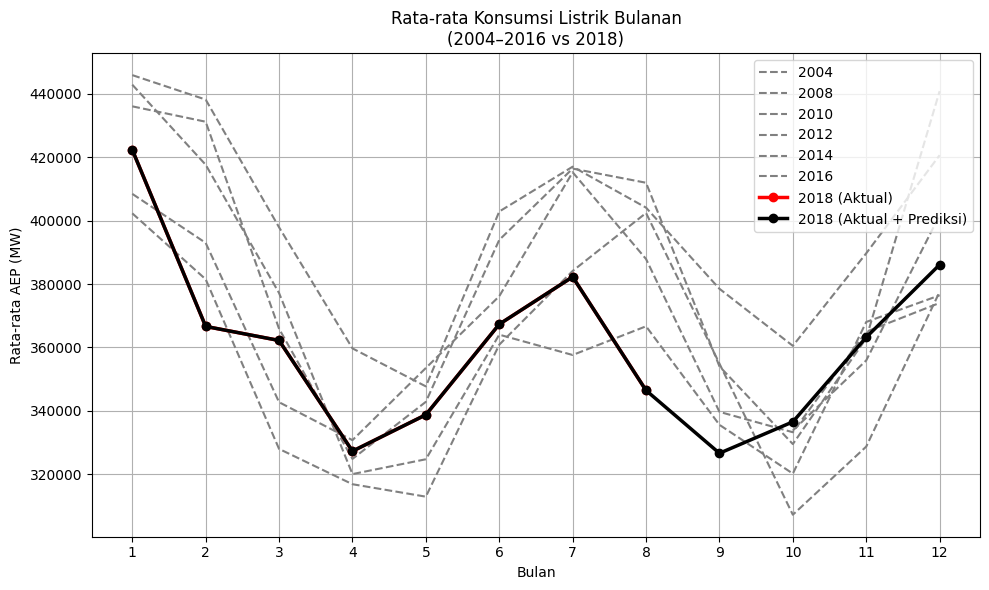

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Gabungkan aktual (sampai 3 Agustus) dan prediksi (mulai 4 Agustus)
df_actual_2018 = df[df.index.year == 2018][['Total_AEP_MW']].copy()
df_actual_2018 = df_actual_2018[df_actual_2018.index <= '2018-08-03']
df_actual_2018['Year'] = df_actual_2018.index.year
df_actual_2018['Month'] = df_actual_2018.index.month

# Prediksi mulai 2018-08-04 s/d 2018-12-31
pred_2018 = pd.Series(future_preds, index=forecast_dates, name='Total_AEP_MW').to_frame()
pred_2018['Year'] = pred_2018.index.year
pred_2018['Month'] = pred_2018.index.month

# Gabung aktual + prediksi dengan cakupan bulan benar
df_full_2018 = pd.concat([df_actual_2018, pred_2018])


# Data tahun-tahun lain
selected_years = [2004, 2008, 2010, 2012, 2014, 2016]
df_selected_years = df[df.index.year.isin(selected_years)][['Total_AEP_MW']].copy()
df_selected_years['Year'] = df_selected_years.index.year
df_selected_years['Month'] = df_selected_years.index.month

# Gabungkan semua tahun
df_selected = pd.concat([df_selected_years, df_full_2018])

# Hitung rata-rata bulanan
monthly_avg = df_selected.groupby(['Month', 'Year'])['Total_AEP_MW'].mean().unstack()

# --- Plot ---
plt.figure(figsize=(10, 6))

# Tahun lama
for year in selected_years:
    plt.plot(monthly_avg.index, monthly_avg[year], color='gray', linestyle='--', label=str(year))

# 2018 aktual s/d Agustus
plt.plot(monthly_avg.index[:8], monthly_avg.loc[1:8, 2018], color='red', marker='o', linewidth=2.5, label='2018 (Aktual)')

# 2018 gabungan aktual + prediksi
plt.plot(monthly_avg.index, monthly_avg[2018], color='black', marker='o', linewidth=2.5, label='2018 (Aktual + Prediksi)')

plt.title('Rata-rata Konsumsi Listrik Bulanan\n(2004–2016 vs 2018)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata AEP (MW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


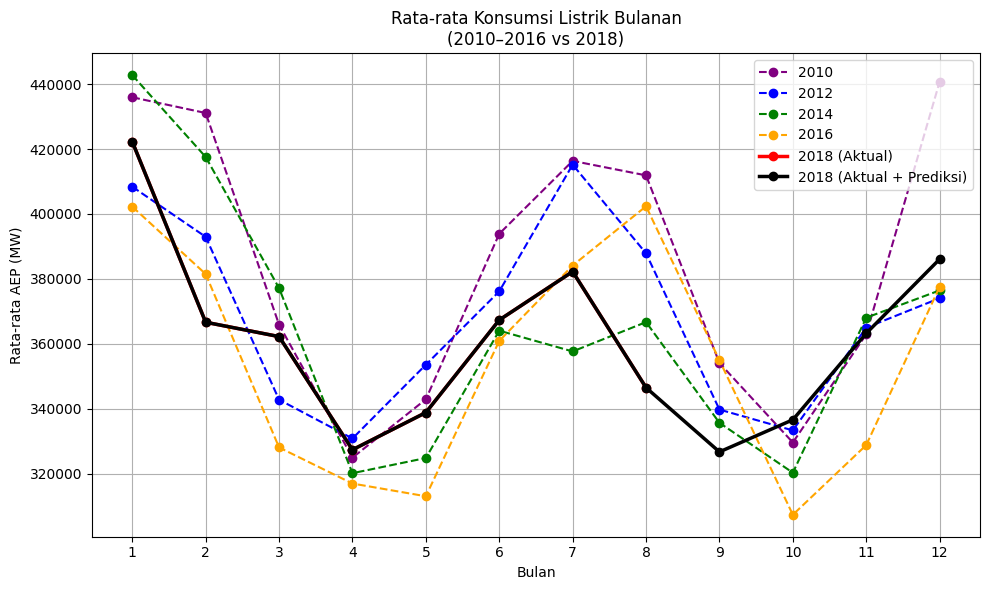

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Gabungkan aktual (sampai 3 Agustus) dan prediksi (mulai 4 Agustus)
df_actual_2018 = df[df.index.year == 2018][['Total_AEP_MW']].copy()
df_actual_2018 = df_actual_2018[df_actual_2018.index <= '2018-08-03']
df_actual_2018['Year'] = df_actual_2018.index.year
df_actual_2018['Month'] = df_actual_2018.index.month

# Prediksi mulai 2018-08-04 s/d 2018-12-31
pred_2018 = pd.Series(future_preds, index=forecast_dates, name='Total_AEP_MW').to_frame()
pred_2018['Year'] = pred_2018.index.year
pred_2018['Month'] = pred_2018.index.month

# Gabung aktual + prediksi dengan cakupan bulan benar
df_full_2018 = pd.concat([df_actual_2018, pred_2018])

# Data tahun-tahun lain
selected_years = [2010, 2012, 2014, 2016]
df_selected_years = df[df.index.year.isin(selected_years)][['Total_AEP_MW']].copy()
df_selected_years['Year'] = df_selected_years.index.year
df_selected_years['Month'] = df_selected_years.index.month

# Gabungkan semua tahun
df_selected = pd.concat([df_selected_years, df_full_2018])

# Hitung rata-rata bulanan
monthly_avg = df_selected.groupby(['Month', 'Year'])['Total_AEP_MW'].mean().unstack()

# --- Plot ---
plt.figure(figsize=(10, 6))

# Warna custom per tahun
year_colors = {
    2010: 'purple',
    2012: 'blue',
    2014: 'green',
    2016: 'orange',
}

for year in selected_years:
    plt.plot(monthly_avg.index, monthly_avg[year], color=year_colors[year], linestyle='--', marker='o', label=str(year))

# 2018 aktual s/d Agustus
plt.plot(monthly_avg.index[:8], monthly_avg.loc[1:8, 2018], color='red', marker='o', linewidth=2.5, label='2018 (Aktual)')

# 2018 gabungan aktual + prediksi
plt.plot(monthly_avg.index, monthly_avg[2018], color='black', marker='o', linewidth=2.5, label='2018 (Aktual + Prediksi)')

# Penyesuaian tampilan
plt.title('Rata-rata Konsumsi Listrik Bulanan\n(2010–2016 vs 2018)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata AEP (MW)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Year
2004    363911.456522
2005    380144.969863
2006    377607.150685
2007    399401.254795
2008    396789.371585
2009    366015.095890
2010    384075.290411
2011    379482.687671
2012    368344.732240
2013    364673.800000
2014    364016.334247
2015    356854.142466
2016    354821.423497
2017    347609.720548
2018    366905.504673
Name: Total_AEP_MW, dtype: float64


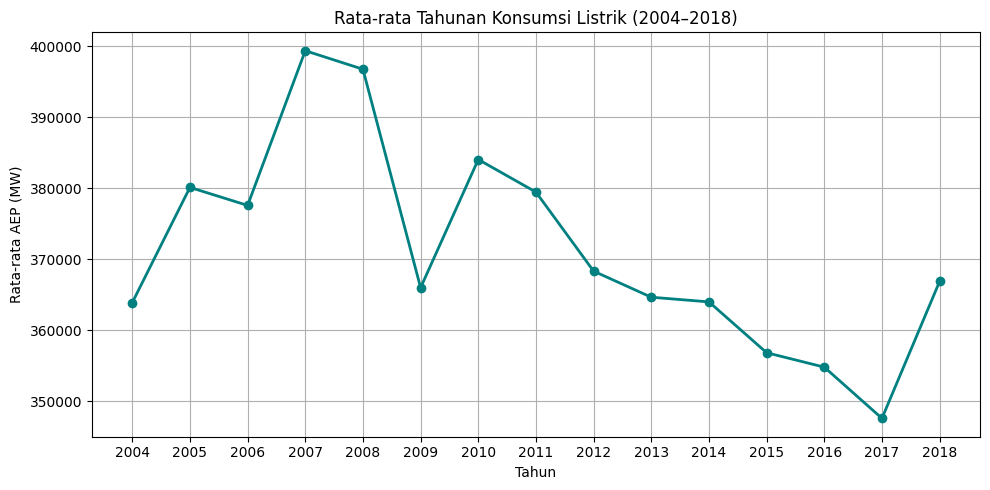

In [113]:
# Tambahkan kolom tahun
df['Year'] = df.index.year

# Hitung rata-rata per tahun dari 2004 sampai 2018
yearly_avg = df[df['Year'].between(2004, 2018)].groupby('Year')['Total_AEP_MW'].mean()

# Tampilkan sebagai tabel
print(yearly_avg)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, color='teal')
plt.title('Rata-rata Tahunan Konsumsi Listrik (2004–2018)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata AEP (MW)')
plt.grid(True)
plt.xticks(range(2004, 2019))
plt.tight_layout()
plt.show()
